# List Full Names of all the participants in your team below:
1. Mayank Lara
2.Gowtham rajasekaran
3.Aaron Liang
4.Sindhu PVP
5.Kapindran Kulandaivelu
6.Anmol Rastogi
7.Surya Muthiah Pillai
8.Yiming Zhang
9.
10.
11.

Hello Machine Learning Engineer Jokang Team, 

You have been given a data which is obtained from **Breast Cancer Dataset**. The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306 <br>
Number of Attributes: 3 (including the target variable `y`)

Attribute Information: 
  * **y**: Survival status (class attribute) 
      * -1 = the patient died within 5 year
      * 1 = the patient survived 5 years or longer
  * **f1**: Age of patient at time of operation (numerical)
  * **f2**: Patient's year of operation (year - 1900, numerical)
  * **f3**: Number of positive axillary nodes detected (numerical)

There are no missing Attribute Values.

Your task is to implement a **Perceptron model using Gradient Descent Solution** to predict if the patient survived within 5 years of contracting breast cancer.



## Gradient Descent Solution
The **genesis equation** for Perceptron Model is of the form:

$\hat{y}(x,w) = g(w^{T}.x + b)$  

$g(a)$ = -1 when a < 0 &<br>
$g(a)$ = +1 when a >= 0

* $y(x,w)$ is predicted output,
* $x$ is the Input
* $w = [w_{1}, w_{2}, .. , w_{F}]$ are the parameters to be learned from training samples with $F$ Features
* $b$ is the bias

#### Perceptron Criterion (Error Function)
Consider $\hat{y}_{i}$ to be the target value (prediction variable) for each input row $x_{i}$.

$\hat{y}_{i}$ = -1 if $x_{i}$ belongs to class $C_{1}$ <br>
$\hat{y}_{i}$ = +1 if $x_{i}$ belongs to class $C_{2}$

Therefore, we want all input to have the following condition to be TRUE: <br>
$w^{T}(x_{i}\hat{y}_{i} + b\hat{y}_{i}) > 0$ <br>

This suggests that we are minimizing the following error function: <br>
$E(x,w,\hat{y}) = -\sum_{x_{i} \in M} w^{T}(x_{i}\hat{y}_{i} + b\hat{y}_{i})$

$M$ are all the set of input $x_{i}$ which are misclassified.

#### Perceptron Learning
Applying Gradient Descent <br>
$w^{\tau + 1}_{j} = w^{\tau}_{j} + \eta . x^{i}_{j} . \hat{y}^{i}$ <br>

$b^{\tau + 1} = b^{\tau} + \eta \sum^{M}_{i = 1} \hat{y}^{i}$ <br>

Where, $i \in M$ datapoints misclassified <br>

YOU NEED TO IMPLEMENT an iterative solution to solve for $w$ (Gradient Descent Solution) 

<font color="red">DO NOT USE SKLEARNS Perceptron LIBRARY DIRECTLY.</font>



### **Question:** In the following code cell implement the following:
* Step 1: Import the dataset using Pandas Dataframe (Step 1 Implemented already)
* Step 2: Partition your dataset into training testing and validation using sklearns train_test_split library and split the features and target labels into seperate variables (Step 2 Implemented already)
* Step 3: Scale the features using sklearns min max scaling function (Step 3 Implemented already)
* Step 4: Convert Scaled Features and Labels into numpy arrays with dimensions required by closed form solution (Step 4 Implemented already)
* Step 5: Initialize the learning rate, number of epochs, weight vector, bias scalar and other variables required for tracking cost.
* Step 6: Train with Training Dataset using Gradient Descent Solution
  Iteratively update the weights and biases for each epoch using:
  * Step 6.1: Use genesis equation $\hat{y} = g(W^{T}.X + b)$ where $W$ is the weight array, $X$ is the input features and $\hat{y}$ is the predicted value. (You will have to perform same operation on validation set as well)
  * Step 6.2: Find Perceptron Criterion Loss Function (L) for training and validation set using predicted value $\hat{y}$ and truth value $y$
    * Perceptron Criteria Cost = $E(x,w,\hat{y}) = -\sum_{x_{i} \in M} w^{T}(x_{i}\hat{y}_{i})$
  * Step 6.3: Find $ \Delta W_{j} = \frac{\delta L}{\delta W_{j}}$ and $ \Delta b = \frac{\delta L}{\delta b}$ where $j = 1$ to $F$(Proof for finding  $\Delta W$ and $\Delta b$ is available in the appendix below)
    * $ \Delta W_{j} = \frac{\delta L}{\delta W_{j}} = -\sum_{x_{i} \in M} x_{i}\hat{y}_{i}$
    * $ \Delta b = \frac{\delta L}{\delta b} = -\sum_{x_{i} \in M} \hat{y}_{i}$
  * Step 6.4: Update $W$ and $b$ using learning rate($\eta$) as follows:
    - $W_{j} = W_{j} - \eta*\Delta W_{j}$
    - $b = b - \eta*\Delta b$
  * Step 6.5: Store Perceptron Cost for training and validation in cost tracking lists
* Step 7: Plot validation and training cost vs number of epochs (Already Implemented)
* Step 8: Test using Testing Dataset
  * Step 8.1: Use genesis equation $\hat{y} = W^{T}.X_{test} + b$ where $W$ is the weight array, $X_{test}$ is the input test features and $\hat{y}$ is the predicted value.
  * Step 8.2: Calculate Accuracy using Sklearns.Metrics library.
  * Step 8.3: Calculate Mean Squared Error (MSE) for Test Dataset
    * Perceptron Criteria Cost = $E(x,w,\hat{y}) = -\sum_{x_{i} \in M} w^{T}(x_{i}\hat{y}_{i})$

## TA Response

In [5]:
# Step 1 already implemented
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/Mihir2/BreakoutSessionDataset/master/haberman.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

# Step 2 already implemented
import numpy as np
from sklearn.model_selection import train_test_split
output = data['y']
input = data.to_numpy()[:,1:]
x_train, x_val_test, y_train, y_val_test = train_test_split(input, output, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size = 0.5)

# Step 3 already implemented
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_xtrain = scaler.fit_transform(x_train)
sc_xval = scaler.fit_transform(x_val)
sc_xtest = scaler.transform(x_test)

# Step 4 already implemented
y_train_arr = y_train.to_numpy().reshape(y_train.shape[0],1).T
x_train_arr = sc_xtrain.T
y_val_arr = y_val.to_numpy().reshape(y_val.shape[0],1).T
x_val_arr = sc_xval.T
y_test_arr  = y_test.to_numpy().reshape(y_test.shape[0],1).T
x_test_arr  = sc_xtest.T

# Step 5 already implemented
learningrate = 0.001
epochs = 1000
bias = 0

number_of_features         = x_train_arr.shape[0]
number_of_train_datapoints = x_train_arr.shape[1]
number_of_val_datapoints   = x_val_arr.shape[1]
number_of_test_datapoints  = x_test_arr.shape[1]

weights = np.random.randn(number_of_features,1)

training_cost_track = []
val_cost_track = []

In [8]:
# Step 6
for epoch in range(epochs):
    
    # Step 6.1 y_pred = g(wT.X + b) (For Training and Validation dataset)
    train_pred = np.dot(weights.T, x_train_arr + bias)
    val_pred   = np.dot(weights.T, x_val_arr + bias)
    
    train_pred[train_pred < 0] = -1
    train_pred[train_pred >= 0] = +1
    
    val_pred[val_pred < 0] = -1
    val_pred[val_pred >= 0] = +1
    
    # Step 6.2 Perceptron Cost for Training and Validation Dataset
    train_pred[train_pred == y_train_arr] = 0
    val_pred[val_pred == y_val_arr] = 0
    
    train_cost = -np.sum(np.dot(weights.T, np.multiply(train_pred,x_train_arr)))
    val_cost = -np.sum(np.dot(weights.T, np.multiply(train_pred,x_train_arr)))
    
    # Step 6.3: Calculate derivatives
    dw = np.dot(x_train_arr, train_pred.T)
    db = np.sum(train_pred)
    
    # Step 6.4: update weights and bias
    weights = weights - learningrate * dw
    bias = bias - learningrate*db

    # Step 6.5: Store perceptron cost for training and validation in seperate cost tracking list
    training_cost_track.append(train_cost)
    val_cost_track.append(val_cost)

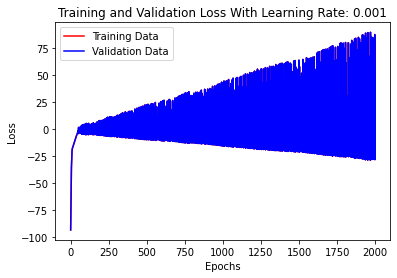

In [9]:
# Step 7: Plot MSE cost for training and validation set vs number of epochs (Already Implemented)
import matplotlib.pyplot as plt
plt.title('Training and Validation Loss With Learning Rate: ' + str(learningrate))
plt.plot(training_cost_track, color='red', label='Training Data')
plt.plot(val_cost_track, color='blue', label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Step 8.1: Test using Testing Dataset: Get the predicted values 
test_pred = np.dot(weights.T, x_test_arr)

test_pred[test_pred < 0] = -1
test_pred[test_pred >= 0] = +1

# Step 8.2 Calculate the Accuracy for Testing Dataset
from sklearn.metrics import accuracy_score
print(accuracy_score(test_pred.flatten(),y_test_arr.flatten()))

# Step 8.3: Calculate the error for Testing dataset
test_pred[test_pred == y_test_arr] = 0
test_cost = -np.sum(np.dot(weights.T, np.multiply(test_pred,x_test_arr)))

0.7096774193548387


## Student Response

In [ ]:
# Step 1 already implemented
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/Mihir2/BreakoutSessionDataset/master/haberman.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

# Step 2 already implemented
import numpy as np
from sklearn.model_selection import train_test_split
output = data['y']
input = data.to_numpy()[:,1:]
x_train, x_val_test, y_train, y_val_test = train_test_split(input, output, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size = 0.5)

# Step 3 already implemented
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_xtrain = scaler.fit_transform(x_train)
sc_xval = scaler.fit_transform(x_val)
sc_xtest = scaler.transform(x_test)

# Step 4 already implemented
y_train_arr = y_train.to_numpy().reshape(y_train.shape[0],1).T
x_train_arr = sc_xtrain.T
y_val_arr = y_val.to_numpy().reshape(y_val.shape[0],1).T
x_val_arr = sc_xval.T
y_test_arr  = y_test.to_numpy().reshape(y_test.shape[0],1).T
x_test_arr  = sc_xtest.T

# Step 5 already implemented
learningrate = 0.001
epochs = 1000
bias = 0

number_of_features         = x_train_arr.shape[0]
number_of_train_datapoints = x_train_arr.shape[1]
number_of_val_datapoints   = x_val_arr.shape[1]
number_of_test_datapoints  = x_test_arr.shape[1]

weights = np.random.randn(number_of_features,1)

training_cost_track = []
val_cost_track = []

In [ ]:
def g(val):
    val[val>=0]=1
    val[val<0]=-1
    return val
    
# Step 6
for epoch in range(epochs):
    
    # Step 6.1 y_pred = g(wT.X + b) (For Training and Validation dataset)
    train = np.dot(weights.T,x_train_arr) + bias 
    valid = np.dot(weights.T,x_val_arr) + bias
    valid_pred = g(valid)
    y_pred = g(train)
    
    # Step 6.2 Perceptron Cost for Training and Validation Dataset
    y_pred[y_pred == y_train_arr] = 0
    valid_pred[valid_pred == y_val_arr] = 0
    E = -np.dot(weights.T,np.dot(x_train_arr,y_pred.T))
    E_valid = -np.dot(weights.T,np.dot(x_val_arr,valid_pred.T))

    # Step 6.3: Calculate derivatives
    dW = -np.dot(x_train_arr,y_pred.T)
    dB = -sum(y_pred.astype(float).flatten())
    
    # Step 6.4: update weights and bias
    weights = weights - learningrate*dW
    bias = bias - learningrate*dB
    
    # Step 6.5: Store perceptron cost for training and validation in seperate cost tracking list
    training_cost_track.append(np.squeeze(E))
    val_cost_track.append(np.squeeze(E_valid ))

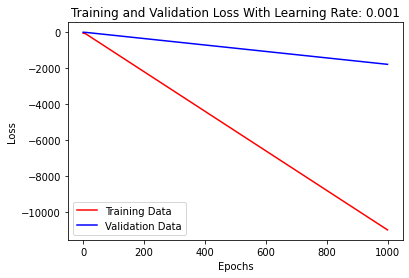

In [ ]:
# Step 7: Plot MSE cost for training and validation set vs number of epochs (Already Implemented)
import matplotlib.pyplot as plt
plt.title('Training and Validation Loss With Learning Rate: ' + str(learningrate))
plt.plot(training_cost_track, color='red', label='Training Data')
plt.plot(val_cost_track, color='blue', label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
# Step 8.1: Test using Testing Dataset: Get the predicted values 
test = np.dot(weights.T,x_test_arr) + bias 
test_pred = g(test)

# Step 8.2 Calculate the Accuracy for Testing Dataset
accuracy_score(y_test_arr.flatten(), test_pred.astype(float).flatten())

# Step 8.3: Calculate the error for Testing dataset\
test_pred[test_pred == y_test_arr] = 0
E_test = -np.dot(weights.T,np.dot(x_test_arr,test_pred.T))


0.1935483870967742